# Assignment 1 :- Linear Regression for Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("H:/Shubham Coding/Classwork/Day 21 to/Day 21/Linear Regression.xlsx")
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [3]:
data.isnull().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

## EDA Performing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027DB266CBC8>,
      dtype=object)

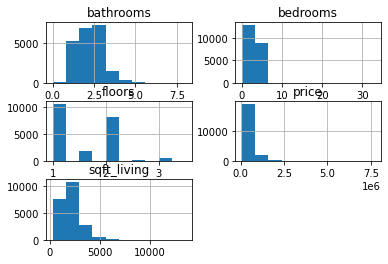

In [4]:
data.hist()

In [5]:
data.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


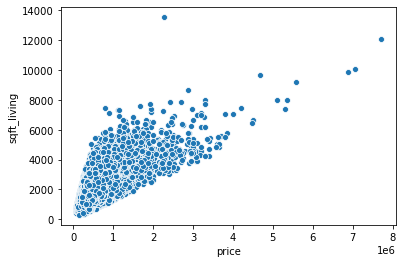

In [6]:
sns.scatterplot(data['price'],data['sqft_living'])

__Data is highly correlated i.e. positively correlated__

# Model 1 :- price v/s sqft_living

In [109]:
x = data.iloc[:,1:2]

In [110]:
x

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
...,...
21608,1530
21609,2310
21610,1020
21611,1600


In [111]:
y = data.iloc[:,:1]

In [112]:
y

,price
0,221900
1,538000
2,180000
3,604000
4,510000
...,...
21608,360000
21609,400000
21610,402101
21611,400000


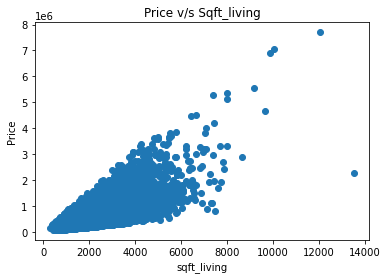

In [113]:
plt.scatter(x,y)
plt.title('Price v/s Sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.show()

__Data is highly positively correlated__

## Train the Model

In [114]:
#Spliting the record for training & testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 2)

In [115]:
data.shape

(21613, 5)

In [116]:
x_train.shape

(17290, 1)

In [117]:
y_train.shape
# 80% data is allocated for training

(17290, 1)

In [118]:
# Building Model with sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [119]:
# Training Model :-
lin_reg.fit(x_train,y_train)

LinearRegression()

In [124]:
lin_reg.coef_ # Slope m

array([[280.67382569]])

In [126]:
lin_reg.intercept_ # Constant c

array([-42568.70358496])

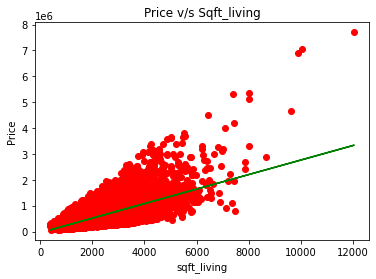

In [127]:
#visualise training set results
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, lin_reg.predict(x_train), color='green')
plt.title('Price v/s Sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.show()
#Red dots - are actual plots ; green line - predicted line

## Test The Model

In [128]:
y_pred=lin_reg.predict(x_test)
y_pred

array([[633855.21632509],
       [566493.49815977],
       [364408.34366382],
       ...,
       [701216.9344904 ],
       [187583.83347987],
       [465450.9209118 ]])

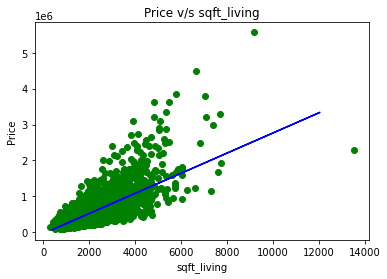

In [129]:
#visualise testing set results
plt.scatter(x_test, y_test, color='green')
plt.plot(x_train, lin_reg.predict(x_train), color='blue')
plt.title('Price v/s sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.show()
# for testing datapoints - line is okay not all points are covered but it is reasonable performance

## Estimate The Accuracy

In [130]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
r_square=r2_score(y_test,y_pred)

print('The R-Square value is : ',r_square)
print('The RMSE value is : ',RMSE)
#r-square value is 0.50 i.e. 50% model is working fine

The R-Square value is :  0.5031163723285275
The RMSE value is :  263380.00189817196


In [131]:
#Unseen Value prediction
unseen_pred=lin_reg.predict(np.array([[2410]]))
print('The unseen for the given x is....',unseen_pred)

The unseen for the given x is.... [[633855.21632509]]


## Inference Of Model 1
50 % Model is working good
1. The Correlation Coefficient b/w price and sqft is 0.7 which means it is 'Good Correlation'
2. R2 Score is 0.5031 i.e. 50.31% of variation in house price is explained by the variation in the square feet.
3. Regression eqn for House price = [-42568.70358496+280.67382569(sqft)]

# Model 2 :- Price v/s bedrooms

In [132]:
x = data.iloc[:,2:3]
x

,bedrooms
0,3
1,3
2,2
3,4
4,3
...,...
21608,3
21609,4
21610,2
21611,3


In [133]:
y = data.iloc[:,:1]
y

,price
0,221900
1,538000
2,180000
3,604000
4,510000
...,...
21608,360000
21609,400000
21610,402101
21611,400000


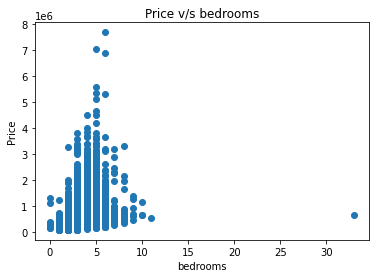

In [134]:
plt.scatter(x,y)
plt.title('Price v/s bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('Price')
plt.show()

## Train the model

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 2)

In [136]:
data.shape

(21613, 5)

In [137]:
x.shape

(21613, 1)

In [138]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [139]:
lin_reg.coef_

array([[118660.62797869]])

In [141]:
lin_reg.intercept_

array([139952.87593386])

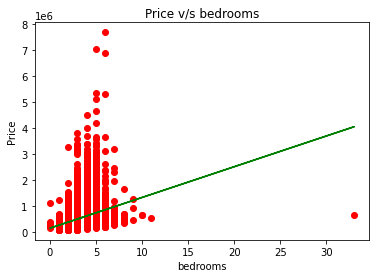

In [142]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, lin_reg.predict(x_train), color='green')
plt.title('Price v/s bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('Price')
plt.show()

## Test the Model

In [143]:
y_pred=lin_reg.predict(x_test)
y_pred

array([[614595.3878486 ],
       [495934.75986992],
       [377274.13189123],
       ...,
       [614595.3878486 ],
       [377274.13189123],
       [614595.3878486 ]])

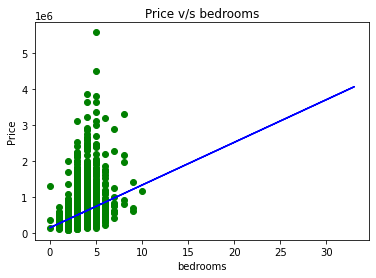

In [144]:
plt.scatter(x_test, y_test, color='green')
plt.plot(x_train, lin_reg.predict(x_train), color='blue')
plt.title('Price v/s bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('Price')
plt.show()

## Estimate the Accuracy

In [145]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
r_square=r2_score(y_test,y_pred)

print('The R-Square value is : ',r_square)
print('The RMSE value is : ',RMSE)
#r-square value is 0.10 i.e. 10% model is working fine

The R-Square value is :  0.10886345250291585
The RMSE value is :  352717.9654187645


In [146]:
unseen_pred=lin_reg.predict(np.array([[3]]))
print('The unseen for the given x is....',unseen_pred)

The unseen for the given x is.... [[495934.75986992]]


__10% Model is good__

## Inference Of Model 2 Price v/s bedrooms
10 % Model is working good
1. The corrleation coefficient b/w Price & sqft is 0.30 which means "Modreate Correlation"
2. R2 score is 0.10 which means 10% of variation in house price is explained by the variation in the no of bedrooms.
3. Regression eqn for House price = [139952.87593386+118660.62797869(bedrooms)]

# Model 3 :- Price v/s bathrooms

In [147]:
x = data.iloc[:,3:4]
x

,bathrooms
0,1.00
1,2.25
2,1.00
3,3.00
4,2.00
...,...
21608,2.50
21609,2.50
21610,0.75
21611,2.50


In [148]:
y = data.iloc[:,:1]
y

,price
0,221900
1,538000
2,180000
3,604000
4,510000
...,...
21608,360000
21609,400000
21610,402101
21611,400000


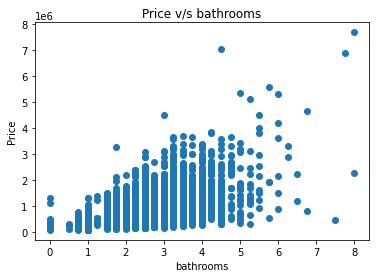

In [149]:
plt.scatter(x,y)
plt.title('Price v/s bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('Price')
plt.show()
# Model is Positively correlated

## Train the Model

In [150]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 2)

In [151]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [152]:
lin_reg.coef_

array([[249143.95803858]])

In [153]:
lin_reg.intercept_

array([13073.99575289])

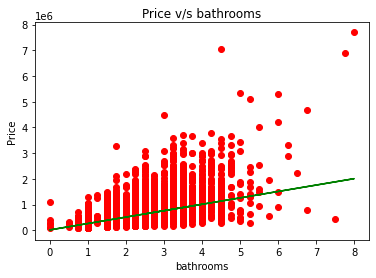

In [154]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, lin_reg.predict(x_train), color='green')
plt.title('Price v/s bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('Price')
plt.show()

## Test the Model

In [155]:
y_pred=lin_reg.predict(x_test)
y_pred

array([[573647.90133969],
       [386789.93281076],
       [262217.95379147],
       ...,
       [635933.89084934],
       [262217.95379147],
       [698219.88035898]])

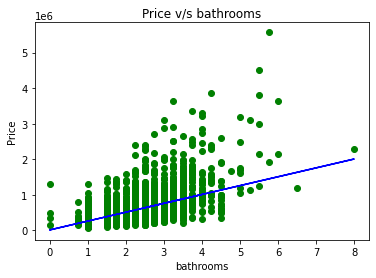

In [156]:
plt.scatter(x_test, y_test, color='green')
plt.plot(x_train, lin_reg.predict(x_train), color='blue')
plt.title('Price v/s bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('Price')
plt.show()

## Estimate the Accuracy :

In [157]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
r_square=r2_score(y_test,y_pred)

print('The R-Square value is : ',r_square)
print('The RMSE value is : ',RMSE)
#r-square value is 0.28 i.e. 28% model is working fine

The R-Square value is :  0.28122887124177365
The RMSE value is :  316774.90190998075


In [159]:
unseen_pred=lin_reg.predict(np.array([[2.5]]))
print('The unseen for the given x is....',unseen_pred)

The unseen for the given x is.... [[635933.89084934]]


__28 % Model is Good__

# Inference Of Model 3 Price vs No of Bathrooms
28% Model is Good
1.The corrleation coefficient b/w Price & No of Bathrooms is 0.52 which means "Moderate Correlation"

2.R2 score is 0.28 which means 28% of variation in house price is explained by the variation in the no of bathrooms.

3.Regression eqn for House price = [13073.99575289+249143.95803858(bathrooms)]


# Model 4 :- Price v/s floors

In [160]:
x = data.iloc[:,4:5]
x

,floors
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0
...,...
21608,3.0
21609,2.0
21610,2.0
21611,2.0


In [161]:
y = data.iloc[:,:1]
y

,price
0,221900
1,538000
2,180000
3,604000
4,510000
...,...
21608,360000
21609,400000
21610,402101
21611,400000


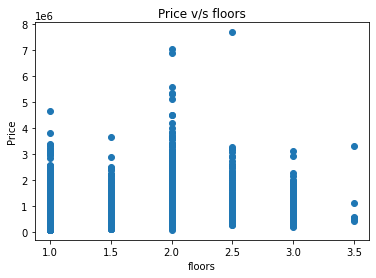

In [162]:
plt.scatter(x,y)
plt.title('Price v/s floors')
plt.xlabel('floors')
plt.ylabel('Price')
plt.show()
# Model is not so correlated

## Train The Model

In [163]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 2)

In [164]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [165]:
lin_reg.coef_

array([[171376.44562902]])

In [166]:
lin_reg.intercept_

array([283309.93245028])

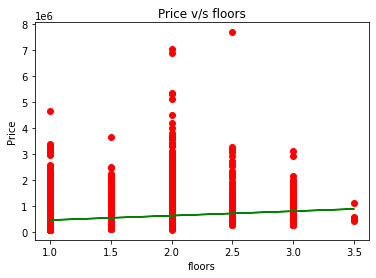

In [167]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, lin_reg.predict(x_train), color='green')
plt.title('Price v/s floors')
plt.xlabel('floors')
plt.ylabel('Price')
plt.show()

## Test The Model

In [168]:
y_pred=lin_reg.predict(x_test)
y_pred

array([[540374.60089382],
       [454686.37807931],
       [454686.37807931],
       ...,
       [626062.82370833],
       [454686.37807931],
       [540374.60089382]])

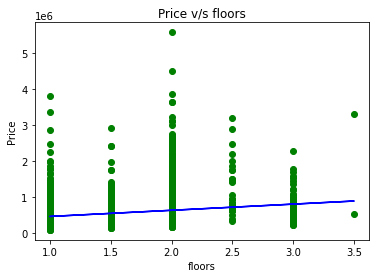

In [169]:
plt.scatter(x_test, y_test, color='green')
plt.plot(x_train, lin_reg.predict(x_train), color='blue')
plt.title('Price v/s floors')
plt.xlabel('floors')
plt.ylabel('Price')
plt.show()

## Estimate the Accuracy

In [170]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
r_square=r2_score(y_test,y_pred)

print('The R-Square value is : ',r_square)
print('The RMSE value is : ',RMSE)
#r-square value is 0.07 i.e. 7% model is working fine

The R-Square value is :  0.0733487976687478
The RMSE value is :  359677.77234107786


In [172]:
unseen_pred=lin_reg.predict(np.array([[3]]))
print('The unseen for the given x is....',unseen_pred)

The unseen for the given x is.... [[797439.26933736]]


__7% Model is Good__

## Inference for Price vs No of floors
7% Model is good

1.The corrleation coefficient b/w Price & sqft is 0.25 which means "No Correlation"

2.R2 score is 0.06 which means 7% of variation in house price is explained by the variation in the floors.

3.Regression eqn for House price = [283309.93245028+171376.44562902(floors)]

# Multicollinearity Model no. 5

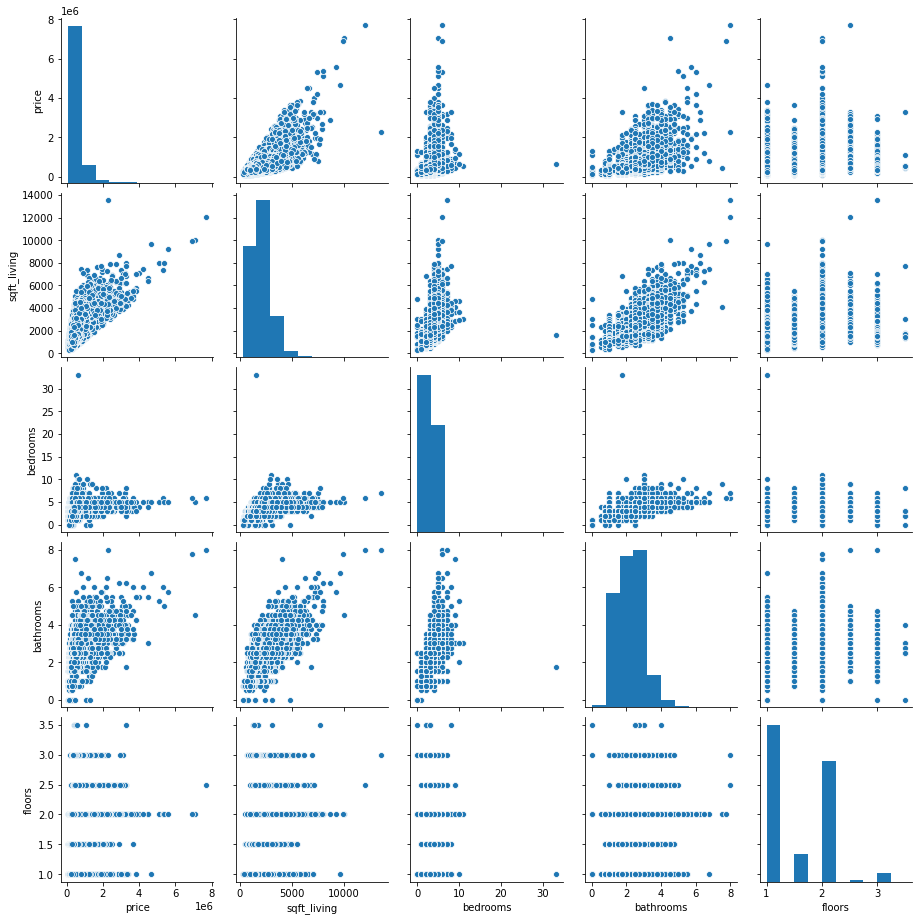

In [177]:
sns.pairplot(data)

In [178]:
data

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0
...,...,...,...,...,...
21608,360000,1530,3,2.50,3.0
21609,400000,2310,4,2.50,2.0
21610,402101,1020,2,0.75,2.0
21611,400000,1600,3,2.50,2.0


In [179]:
data.isna().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [180]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [181]:
data1 = sc.fit_transform(data)
data1

array([[-0.86671733, -0.97983502, -0.39873715, -1.44746357, -0.915427  ],
       [-0.00568792,  0.53363434, -0.39873715,  0.1756067 ,  0.93650577],
       [-0.98084935, -1.42625404, -1.47395936, -1.44746357, -0.915427  ],
       ...,
       [-0.37586519, -1.15404732, -1.47395936, -1.77207762,  0.93650577],
       [-0.38158814, -0.52252773, -0.39873715,  0.50022075,  0.93650577],
       [-0.58588173, -1.15404732, -1.47395936, -1.77207762,  0.93650577]])

In [182]:
x = data.iloc[:,1:]
x

,sqft_living,bedrooms,bathrooms,floors
0,1180,3,1.00,1.0
1,2570,3,2.25,2.0
2,770,2,1.00,1.0
3,1960,4,3.00,1.0
4,1680,3,2.00,1.0
...,...,...,...,...
21608,1530,3,2.50,3.0
21609,2310,4,2.50,2.0
21610,1020,2,0.75,2.0
21611,1600,3,2.50,2.0


In [183]:
y = data.iloc[:,:1]
y

,price
0,221900
1,538000
2,180000
3,604000
4,510000
...,...
21608,360000
21609,400000
21610,402101
21611,400000


In [184]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=2)

In [185]:
data1.shape

(21613, 5)

In [186]:
x_train.shape

(16209, 4)

In [187]:
y_train.shape

(16209, 1)

## Train The MultiCollinearity Model

In [188]:
from sklearn.linear_model import LinearRegression
mul_reg = LinearRegression()

In [189]:
mul_reg

LinearRegression()

In [190]:
mul_reg.fit(x_train,y_train)

LinearRegression()

In [191]:
mul_reg.coef_

array([[   305.40833301, -55597.29363454,   7247.91450528,
          1362.74662272]])

In [192]:
mul_reg.intercept_

array([75678.1227437])

## Test The Model

In [193]:
ypred=mul_reg.predict(x_test)
ypred

array([[607674.9583261 ],
       [583856.94284837],
       [415936.27946441],
       ...,
       [533188.7734709 ],
       [516048.79857589],
       [336717.4769497 ]])

## Estimate the Accuracy :-

In [194]:
from sklearn.metrics import r2_score,mean_squared_error
print('The R-square value is : ',r2_score(y_test,ypred))
print('RMSE value is : ',np.sqrt(mean_squared_error(y_test,ypred)))

The R-square value is :  0.5152390217740295
RMSE value is :  267619.1189755923


__R-square value is 0.5152 i.e. 51.52% Model is good and Accurate__

## Inference for Price vs All Features

1.R2 score is 0.5152 which means 51.52% of variation in house price is explained by the variation in the sqft,no of bedrooms, no of bathrooms & floors.

2.Regression eqn for House price = [75678.1227437+305.40833301(sqft)-55597.29363454(bedrooms)+7247.91450528(bathrooms)+1362.74662272(floors)]

# Assignment 2 :- Bank_loan_Modelling
# Logistic Regression

In [211]:
data1 = pd.read_excel("H:/Shubham Coding/Classwork/Day 21 to/Day 21/Bank_Personal_Loan_Modelling.xlsx",sheet_name=1)
data1.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [212]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [213]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [217]:
data1 = data1.drop("ZIP Code",axis=1)

In [218]:
data1.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


In [219]:
y1 = data1["Personal Loan"]
y1

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [220]:
x1 = data1[["Age","Experience","Income","Family","CCAvg","Education","Mortgage",\
           "Securities Account","CD Account","Online","CreditCard"]]
x1

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [221]:
import statsmodels.api as sm

In [222]:
X1 = sm.add_constant(x1)

In [223]:
log_reg1 = sm.Logit(y1,X1)

In [224]:
result1 = log_reg1.fit()

Optimization terminated successfully.
         Current function value: 0.128435
         Iterations 9


In [225]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4988
Method:                           MLE   Df Model:                           11
Date:                Sun, 09 Aug 2020   Pseudo R-squ.:                  0.5938
Time:                        22:59:06   Log-Likelihood:                -642.18
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1928      1.645     -7.411      0.000     -15.417      -8.968
Age                   -0.0536      0.061     -0.874      0.382      -0.174       0.067
Experience             0.0638      0.061      1.046      0.295      -0.056       0.183
Income                 0.0546      0.003     20.831      0.000       0.049       0.060
Family                 0.6958      0.074      9.364      0.000       0.550       0.841
CCAvg                  0.1240      0.040      3.127      0.002       0.046       0.202
Education              1.7362      0.115     15.088      0.000       1.511       1.962
Mortgage               0.0005      0.001      0.856      0.392      -0.001       0.002
Securities Account    -0.9368      0.286     -3.277      0.001      -1.497      -0.377
CD Account             3.8225      0.324     11.800      0.000       3.188       4.457
Online                -0.6752      0.157     -4.298      0.000      -0.983      -0.367
CreditCard            -1.1197      0.205     -5.462      0.000      -1.522      -0.718
======================================================================================
"""

## Inference for Bank_loan_modelling

1.As per the above table Features like "Income","Family","Education","Securities Account","CD Account","CCAvg","Online" & "CreditCard" are considered to be of high significance for approval or sanction of Personal loan as their p value is "0".

2.Howevere Features like "Age", "Experience" & "Mortgage" are also considered significant to some extend as their p value is less than "0.05".


# Assignment No. 3 :- Attrition Analysis
# Logistic Regression

In [227]:
data2 = pd.read_csv("H:/Shubham Coding/Classwork/Day 21 to/Day 21/general_data.csv")
data2.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [229]:
data2 = data2.drop(columns = ['EmployeeID', 'EmployeeCount', 'Over18', 'StandardHours']) #Dropping Columns
data2.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4


In [231]:
from sklearn.preprocessing import LabelEncoder
def encode(cols):
    enc = LabelEncoder()
    for col in cols:
        data2[col] = enc.fit_transform(data2[col])

In [232]:
encode_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
encode(encode_cols)

In [233]:
data2.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [234]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int32  
 2   BusinessTravel           4410 non-null   int32  
 3   Department               4410 non-null   int32  
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   int32  
 7   Gender                   4410 non-null   int32  
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   int32  
 10  MaritalStatus            4410 non-null   int32  
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [236]:
data2.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [237]:
data2.dropna(how = 'any', inplace =True) #dropping NA values

In [238]:
data2.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [239]:
y2 = data2["Attrition"]
y2

0       0
1       1
2       0
3       0
4       0
       ..
4404    0
4405    0
4406    0
4407    0
4408    0
Name: Attrition, Length: 4382, dtype: int32

In [240]:
x2 = data2[["Age","BusinessTravel","Department","DistanceFromHome","Education","EducationField","Gender","JobLevel","JobRole",\
"MaritalStatus","MonthlyIncome","NumCompaniesWorked","PercentSalaryHike","StockOptionLevel","TotalWorkingYears",\
            "TrainingTimesLastYear","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager"]]
x2

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,2,2,4,3,4,0,2,1,2,35390,1.0,18,0,6.0,2,6,1,5
4405,42,2,1,5,4,3,0,1,6,2,60290,3.0,17,1,10.0,5,3,0,2
4406,29,2,1,2,4,3,1,1,2,0,26790,2.0,15,0,10.0,2,3,0,2
4407,25,2,1,25,2,1,1,2,7,1,37020,0.0,20,0,5.0,4,4,1,2


In [241]:
X2 = sm.add_constant(x2)

In [242]:
log_reg2 = sm.Logit(y2,X2)

In [243]:
result2 = log_reg2.fit()

Optimization terminated successfully.
         Current function value: 0.392916
         Iterations 7


In [244]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4382
Model:                          Logit   Df Residuals:                     4362
Method:                           MLE   Df Model:                           19
Date:                Sun, 09 Aug 2020   Pseudo R-squ.:                  0.1093
Time:                        23:09:00   Log-Likelihood:                -1721.8
converged:                       True   LL-Null:                       -1933.1
Covariance Type:            nonrobust   LLR p-value:                 8.681e-78
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0270      0.414      0.065      0.948      -0.785       0.839
Age                        -0.0307      0.007     -4.478      0.000      -0.044      -0.017
BusinessTravel             -0.0137      0.066     -0.209      0.834      -0.143       0.115
Department                 -0.2229      0.082     -2.735      0.006      -0.383      -0.063
DistanceFromHome           -0.0012      0.005     -0.231      0.818      -0.012       0.009
Education                  -0.0664      0.043     -1.555      0.120      -0.150       0.017
EducationField             -0.0954      0.034     -2.849      0.004      -0.161      -0.030
Gender                      0.0855      0.090      0.952      0.341      -0.091       0.262
JobLevel                   -0.0285      0.040     -0.716      0.474      -0.107       0.050
JobRole                     0.0400      0.018      2.226      0.026       0.005       0.075
MaritalStatus               0.5835      0.063      9.212      0.000       0.459       0.708
MonthlyIncome           -1.815e-06   9.57e-07     -1.897      0.058   -3.69e-06    6.01e-08
NumCompaniesWorked          0.1174      0.018      6.390      0.000       0.081       0.153
PercentSalaryHike           0.0126      0.012      1.067      0.286      -0.011       0.036
StockOptionLevel           -0.0675      0.052     -1.302      0.193      -0.169       0.034
TotalWorkingYears          -0.0584      0.012     -4.873      0.000      -0.082      -0.035
TrainingTimesLastYear      -0.1443      0.035     -4.097      0.000      -0.213      -0.075
YearsAtCompany              0.0132      0.018      0.718      0.473      -0.023       0.049
YearsSinceLastPromotion     0.1328      0.020      6.479      0.000       0.093       0.173
YearsWithCurrManager       -0.1394      0.022     -6.288      0.000      -0.183      -0.096
===========================================================================================
"""

# Inference of Attrition_Analysis

1.As per the above table Features like "Age","Department","EducationField","Marital Status","NumCompaniesWorked","TotalWorkingYears","TrainingTimesLastYear","YearsWithCurrManagee" & "YearsSinceLastPromotion" are considered to be of high significance for Attrition as their p value is "0".

2.Howevere Features like "BusinessTravel", "DistanceFromHome","Gender","JobLevel","JobRole","MonthlyIncome","PercentSalaryHike","StockOptionLevel","YearsAtCompany" & "Education" are also considered significant to some extend.